
# User's Guide, Chapter 31: Clefs, Ties, and Beams

Throughout the first thirty chapters, we have repeatedly been using fundamental music notation principles, such as clefs, ties, and beams, but we have never talked about them directly.  This chapter gives a chance to do so and to look at some `Stream` methods that make use of them.

Let's first look at clefs.  They all live in the :ref:`moduleClef` module:

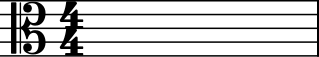

In [1]:
from music21 import *
alto = clef.AltoClef()
m = stream.Measure([alto])
m.show()

Since clefs can be put into Streams, they are Music21Objects, with offsets, etc., but they generally have a Duration of zero.

In [2]:
alto.offset

0.0

In [3]:
alto.duration

<music21.duration.Duration 0.0>

Multiple clefs can coexist in the same measure, and will all display (so long as there's at least one note between them; a problem of our MusicXML readers):

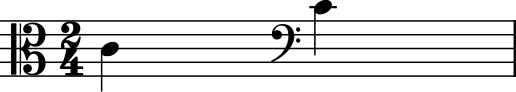

In [4]:
m.append(note.Note('C4'))
bass = clef.BassClef()
m.append(bass)
m.append(note.Note('C4'))
m.show()

Most of the clefs in common use are `PitchClefs` and they know what line they are on:

In [5]:
alto.line

3

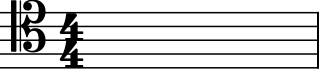

In [6]:
tenor = clef.TenorClef()
tenor.show()

In [7]:
tenor.line

4

In this case, the line refers to the pitch that it's "sign" can be found on.

In [8]:
tenor.sign

'C'

In [9]:
treble = clef.TrebleClef()
treble.sign

'G'

Clefs also have an `.octaveChange` value which specifies how many octaves "off" from the basic clef they are.

In [10]:
treble.octaveChange

0

In [11]:
t8vb = clef.Treble8vbClef()
t8vb.octaveChange

-1

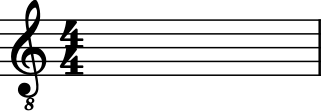

In [12]:
t8vb.show()

There are some clefs that do not support Pitches, such as NoClef:

In [13]:
noClef = clef.NoClef()

This clef is not supported in MuseScore (which I use to generate these docs), but in some other MusicXML readers, will render a score without a clef.  Percussion clefs also are not pitch clefs:

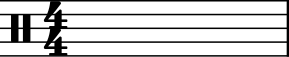

In [15]:
clef.PercussionClef().show()

There are a lot of clefs that are pre-defined in `music21` including unusual ones such as `MezzoSopranoClef`, `SubBassClef`, and `JianpuClef`.  The :ref:`moduleClef` module lists them all.  But you can also create your own clef.

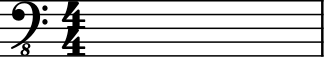

In [16]:
pc = clef.PitchClef()
pc.sign = 'F'
pc.line = 4
pc.octaveChange = -1
pc.show()

And you can get a clef from a string by using the :func:`~music21.clef.clefFromString` function:

In [17]:
clef.clefFromString('treble')

<music21.clef.TrebleClef>

Or from a sign and a number of the line:

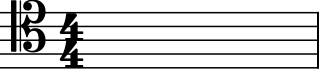

In [18]:
c = clef.clefFromString('C4')
c.show()

If you've run `from music21 import *` be very careful not to name your variable `clef` or you will lose access to the `clef` module!

## Automatic Clef Generation

Look at this quick Stream:

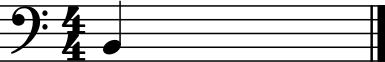

In [19]:
n = note.Note('B2')
s = stream.Stream([n])
s.show()

How did `music21` know to make the clef be bass clef?  It turns out that there's a function in `clef` called :func:`~music21.clef.bestClef` which can return the best clef given the contents of the stream:

In [20]:
clef.bestClef(s)

<music21.clef.BassClef>

In [21]:
s.append(note.Note('C6'))
clef.bestClef(s)

<music21.clef.TrebleClef>

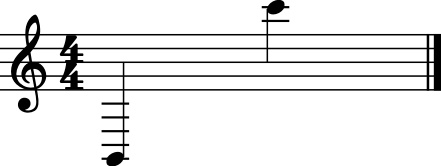

In [22]:
s.show()

`bestClef` has two configurable options, `allowTreble8vb` if set to True, gives the very useful `Treble8vb` clef:

In [23]:
n = note.Note('B3')
s = stream.Stream([n])
clef.bestClef(s, allowTreble8vb=True)

<music21.clef.Treble8vbClef>

And it also has a `recurse` parameter, which should be set to True when running on a nested stream structure, such as a part:

In [24]:
bass = corpus.parse('bwv66.6').parts['bass']
clef.bestClef(bass)

<music21.clef.TrebleClef>

In [25]:
clef.bestClef(bass, recurse=True)

<music21.clef.BassClef>

## Ties

That's enough about clefs, let's move to a similarly basic musical element called "Ties".  Ties connect two pitches at the same pitch level attached to different notes or chords.  All notes have a `.tie` attribute that specifies where the tie lives.  Let's look at the top voice of an Agnus Dei by Palestrina:

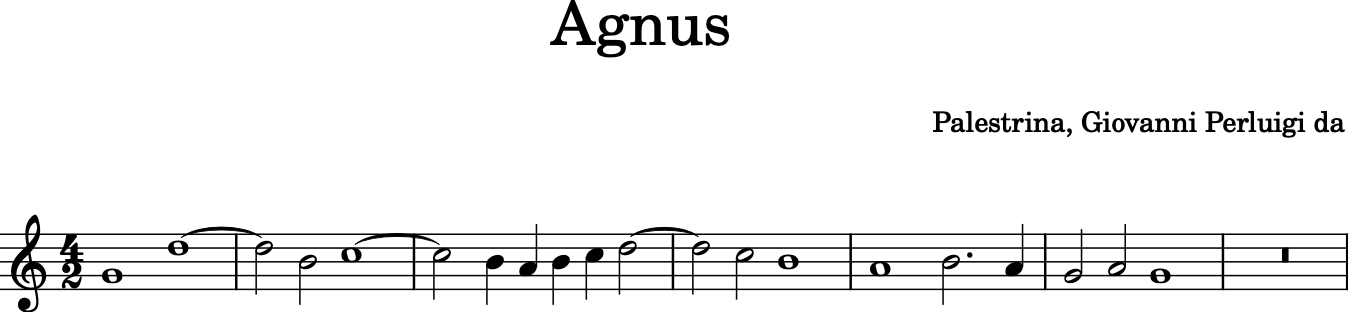

In [26]:
agnus = corpus.parse('palestrina/Agnus_01')
agnusSop = agnus.parts[0]
agnusSop.measures(1, 7).show()

The second note of the first measure is tied, so let's find it:

In [27]:
n1 = agnusSop.recurse().notes[1]
n1

<music21.note.Note D>

Now let's look at the `.tie` attribute:

In [28]:
n1.tie

<music21.tie.Tie start>

This tie says "start".  I'll bet that if we get the next note, we'll find it has a Tie marked "stop":

In [29]:
n1.next('Note').tie

<music21.tie.Tie stop>

The second `.tie` does not produce a graphical object. Thus the Tie object really represents a tied-state for a given note rather than the notational "tie" itself.

The previous `Note` though, has a `.tie` of None

In [30]:
print(n1.previous('Note').tie)

None


We can find the value of 'start' or 'stop' in the `.type` attribute of the :class:`~music21.tie.Tie`.

In [31]:
n1.tie.type

'start'

In [32]:
n1.next('Note').tie.type

'stop'

There is a third tie type, 'continue' if a the note is tied from before and tied to the next note, we'll demonstrate it by creating some notes and ties manually:

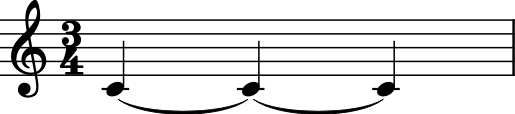

In [33]:
c0 = note.Note('C4')
c0.tie = tie.Tie('start')
c1 = note.Note('C4')
c1.tie = tie.Tie('continue')
c2 = note.Note('C4')
c2.tie = tie.Tie('stop')
s = stream.Measure()
s.append([c0, c1, c2])
s.show()

(Note that if you've worked with MusicXML, the our 'continue' value is similar to the notion in MusicXML of attaching two ties, both a 'stop' and a 'start' tie.)

Ties also have a `.placement` attribute which can be 'above', 'below', or None, the last meaning to allow renderers to determine the position from context:

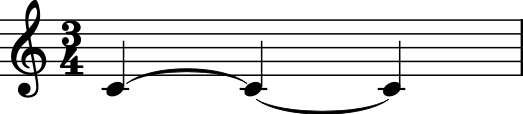

In [34]:
c0.tie.placement = 'above'
s.show()

Setting the placement on a 'stop' tie does nothing.

Ties also have a style attribute that represents how the tie should be displayed.  It can be one of 'normal', 'dotted', 'dashed', or 'hidden'.

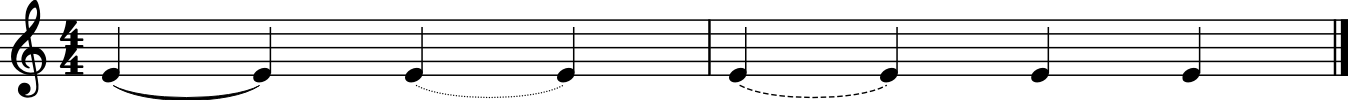

In [35]:
s = stream.Stream()
for tie_style in ('normal', 'dotted', 'dashed', 'hidden'):
    nStart = note.Note('E4')
    tStart = tie.Tie('start')
    tStart.style = tie_style
    nStart.tie = tStart
    nStop = note.Note('E4')
    tStop = tie.Tie('stop')
    tStop.style = tie_style # optional
    nStop.tie = tStop
    s.append([nStart, nStop])
s.show()

It can be hard to tell the difference between 'dotted' and 'dashed' in some notation programs.

### Ties and chords

Chords also have a `.tie` attribute:

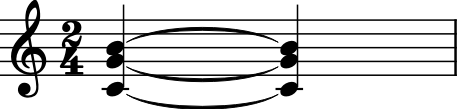

In [36]:
ch0 = chord.Chord('C4 G4 B4')
ch0.tie = tie.Tie('start')
ch1 = chord.Chord('C4 G4 B4')
ch1.tie = tie.Tie('stop')
s = stream.Measure()
s.append([ch0, ch1])
s.show()

This is great and simple if you have two chords that are identical, but what if there are two chords where some notes should be tied and some should not be, such as:

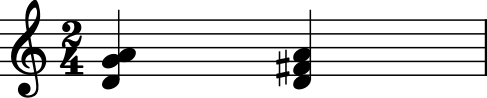

In [37]:
ch2 = chord.Chord('D4 G4 A4')
ch3 = chord.Chord('D4 F#4 A4')
s = stream.Measure()
s.append([ch2, ch3])
s.show()

The D and the A might want to be tied, but the suspended G needs to resolve to the F# without having a tie in it.  The solution obviously relies on assigning a :class:`~music21.tie.Tie` object to a `.tie` attribute somewhere, but this is not the right approach:

In [38]:
p0 = ch2.pitches[0]
p0

<music21.pitch.Pitch D4>

In [39]:
p0.tie = tie.Tie('start')  # Don't do this.

Pitch objects generally do not have `.tie` attributes, and  While we can assign an attribute to almost any object, `music21` looks for the `.tie` attribute on Notes or Chords, not Pitches.  So to do this properly, we need to know that internally, Chords store not just pitch objects, but also Note objects, which you can access by iterating over the Chord:

In [40]:
for n in ch2:
    print(n)

<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>


Aha, so this is a trick.  We could say:

In [41]:
ch2[0]

<music21.note.Note D>

In [42]:
ch2[0].tie = tie.Tie('start')

And that works rather well.  But maybe you don't want to bother remembering which note number in a chord refers to the particular note you want tied?  You can also get Notes out of a chord by treating passing in the pitch name of the Note to the chord:

In [43]:
ch2['A4']

<music21.note.Note A>

Note that this only works properly if the chord does not have any repeated pitches.  We are safe here.  We can also retrieve and specify information directly in the chord from the index:

In [44]:
ch2['D4.tie']

<music21.tie.Tie start>

Or alternatively (though note that this is a string):

In [45]:
ch2['0.tie']

<music21.tie.Tie start>

And we can set the information this way too:

In [46]:
ch2['A4.tie'] = tie.Tie('start')

Now let's set the stop information on the next chord:

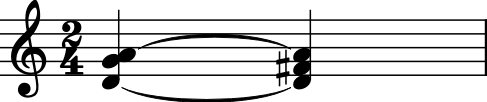

In [47]:
ch3['D4.tie'] = tie.Tie('start')
ch3['A4.tie'] = tie.Tie('start')

s.show()

Voila! it works well.  Now what does `ch2.tie` return?

In [48]:
ch2.tie

<music21.tie.Tie start>

The chord returns information from the highest note.  So if we delete the tie on D4, we get the same answer:

In [48]:
ch2['D4.tie'] = None
ch2.tie

<music21.tie.Tie start>

But if we delete it from A4, we get a different answer:

In [49]:
ch2['A4'].tie = None
ch2.tie is None

True

Here is an example of a case where we might want to set the `.placement` attribute of a tie manually:

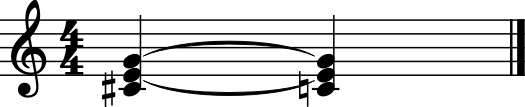

In [50]:
c1 = chord.Chord('C#4 E4 G4')
c2 = chord.Chord('C4 E4 G4')
c1[1].tie = tie.Tie('start')
c2[1].tie = tie.Tie('stop')
c1[2].tie = tie.Tie('start')
c2[2].tie = tie.Tie('stop')
s = stream.Stream()
s.append([c1, c2])
s.show()

Hmm... the E tie intersects with the accidental and looks too confusing with a tie on the C# to C. However, there's a placement attribute beginning in music21 v.4 which can fix this:

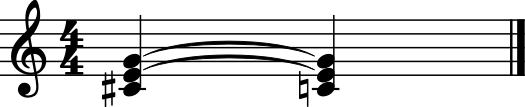

In [51]:
c1[1].tie.placement = 'above'
s.show()

Notice that in some of the examples above, we only set the "start" tie on the first note or chord and not the "stop" tie on the second note or chord.  In most cases, setting the start tie is good enough for music21.  But some analyses require every tie to have a start, optional continue, and stop.  So if you're writing a program that knows where the tie stops, it is best to set it explicitly.

### Making and Stripping Ties from a Stream

Sometimes ties get in the way of analysis.  For instance, take this simple melody created in TinyNotation:

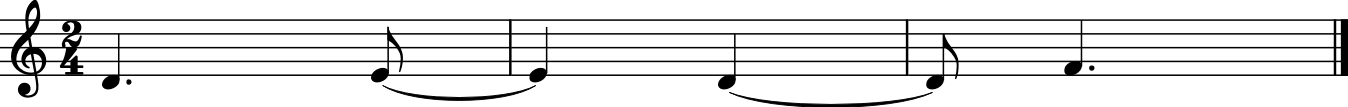

In [2]:
littlePiece = converter.parse('tinyNotation: 2/4 d4. e8~ e4 d4~ d8 f4.')
littlePiece.show()

Suppose we wanted to know how many D's are in this melody.  This, unfortunately, isn't the right approach:

In [3]:
numDs = 0
for n in littlePiece.recurse().notes:
    if n.pitch.name == 'D':
        numDs += 1
numDs

3

The first D is found properly, but the second D, being spanned across a barline, is counted twice.  It is possible to get the right number with some code like this:

In [4]:
numDs = 0
for n in littlePiece.recurse().notes:
    if (n.pitch.name == 'D'
            and (n.tie is None
                 or n.tie.type == 'start')):
        numDs += 1
numDs

2

But this code will get very tedious if you also want to do something more complex, say based on the total duration of all the D's, so it would be better if the Stream had no tied notes in it.

To take a Stream with tied notes and change it into a Stream with tied notes represented by a single note, call :meth:`~music21.stream.Stream.stripTies` on the Stream:

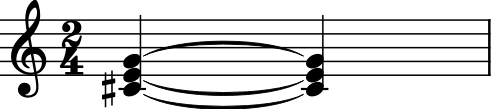

In [5]:
c = chord.Chord('C#4 E4 G4')
c.tie = tie.Tie('start')
c2 = chord.Chord('C#4 E4 G4')
c2.tie = tie.Tie('stop')
s = stream.Measure()
s.append([c, c2])
s.show()

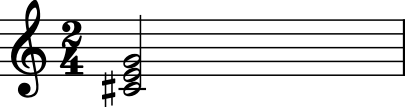

In [6]:
s2 = s.stripTies()
s2.show()

So, getting back to our little piece, all of its notes are essentially dotted quarter notes, but some of them are tied across the barline.  To fix this, let's get a score where the ties are stripped, but we'll retain the measures.

In [7]:
littleStripped = littlePiece.stripTies()

Now we'll count the D's again:

In [8]:
numDs = 0
for n in littleStripped.recurse().notes:
    if n.pitch.name == 'D':
        numDs += 1
numDs

2

That's a lot better.  Let's look at `littleStripped` in a bit more detail, by showing it as a text output with end times of each object added:

In [9]:
littleStripped.show('text', addEndTimes=True)

{0.0 - 3.0} <music21.stream.Measure 1 offset=0.0>
    {0.0 - 0.0} <music21.clef.TrebleClef>
    {0.0 - 0.0} <music21.meter.TimeSignature 2/4>
    {0.0 - 1.5} <music21.note.Note D>
    {1.5 - 3.0} <music21.note.Note E>
{2.0 - 4.5} <music21.stream.Measure 2 offset=2.0>
    {1.0 - 2.5} <music21.note.Note D>
{4.0 - 6.0} <music21.stream.Measure 3 offset=4.0>
    {0.5 - 2.0} <music21.note.Note F>
    {2.0 - 2.0} <music21.bar.Barline type=final>


One thing to notice is that the note E extends now beyond the end of the first 2/4 measure.  The second D, in measure 2, by contrast, does not begin at the beginning of the measure, but instead halfway through the first measure.  This is why it's sometimes
most helpful to follow `stripTies()` with a `.flatten()`:

In [10]:
stripped2 = littlePiece.stripTies().flatten()
stripped2.show('text', addEndTimes=True)

{0.0 - 0.0} <music21.clef.TrebleClef>
{0.0 - 0.0} <music21.meter.TimeSignature 2/4>
{0.0 - 1.5} <music21.note.Note D>
{1.5 - 3.0} <music21.note.Note E>
{3.0 - 4.5} <music21.note.Note D>
{4.5 - 6.0} <music21.note.Note F>
{6.0 - 6.0} <music21.bar.Barline type=final>


In this view, it's easier to see what is going on with the lengths of the various notes and where they should begin.

Remember from :ref:`Chapter 17<usersGuide_17_derivations>`, that if we want to go from the strip-tie note to the original, we can use `.derivation`.  For instance, let's put an accent mark on every other note of the original score, not counting tied notes:

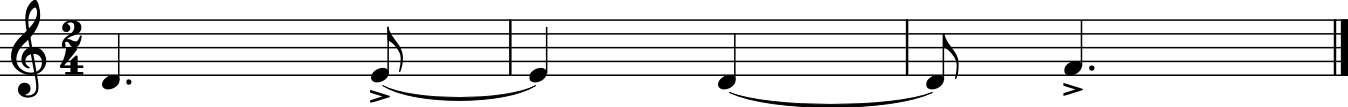

In [11]:
for i, n in enumerate(stripped2.notes):
    if i % 2 == 1:
        nOrigin = n.derivation.origin
        nOrigin.articulations.append(articulations.Accent())
littlePiece.show()

To partially undo the effect of `.stripTies`, run `.makeTies`.  For instance, let's take `.littleStripped` and change all the D's to C's and then get a new part:

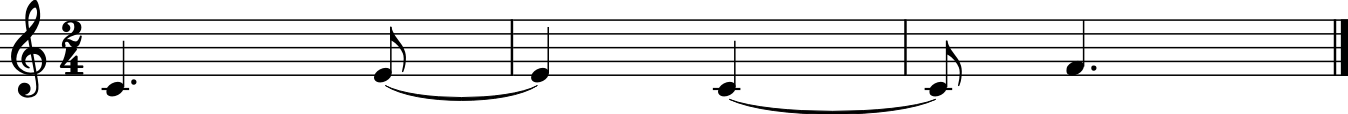

In [12]:
for n in littleStripped.recurse().notes:
    if n.pitch.name == 'D':
        n.pitch.name = 'C'

unstripped = littleStripped.makeTies()
unstripped.show()

Actually, one thing you can count on is that `music21` will run `.makeTies` before showing a piece (since otherwise it can't be displayed in MusicXML) so if all you are going to do is show a piece, go ahead and skip the `.makeTies` call:

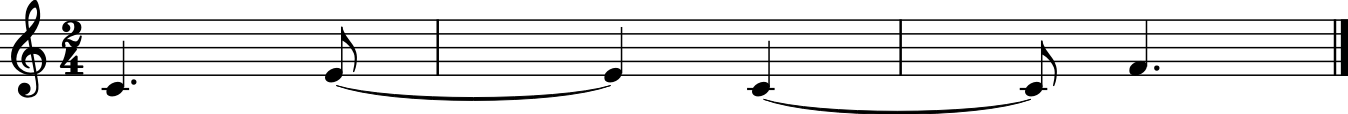

In [13]:
littleStripped.show()

A couple of final comments about `.stripTies`/`.makeTies` are in order.  `.makeTies` is only the reverse of `.stripTies` for notes that extend over a barline ("wrong" notes).  If a piece is in 4/4 and has two half-notes that were tied in a measure (for some reason), `.stripTies` will merge them, but `.makeTies` will leave them alone.  Note also that there may still be ties on chords after running `.stripTies` if there are chords where some pitches are tied and some are not.  The general rule is that after running `.stripTies`, the piece should sound the same as before. 

## Beams

Beams are the little invention of the seventeenth century (replacing the earlier "ligatures") that make it easier to read groups of eighth, sixteenth, and smaller notes by grouping them together.  Formerly not used in vocal music (except in melismas), today beams are used in nearly all contexts, so of course `music21` supports them.

There are two objects that deal with beams, the :class:`~music21.beam.Beam` object which represents a single horizontal line, and the :class:`~music21.beam.Beams` object (with "s" at the end) which deals with collections of `Beam` objects.  Both live in the module called :ref:`moduleBeam`.

Let's create a measure with some nice notes in them:

In [65]:
m = stream.Measure()
c = note.Note('C4', type='quarter')
m.append(c)
d1 = note.Note('D4', type='eighth')
d2 = note.Note('D4', type='eighth')
m.append([d1, d2])
e = note.Note('E4', type='16th')
m.repeatAppend(e, 4)
m.show('text')

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note D>
{1.5} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.25} <music21.note.Note E>
{2.5} <music21.note.Note E>
{2.75} <music21.note.Note E>


Every note and chord has a `.beams` attribute which returns a `Beams` object.

In [66]:
c.beams

<music21.beam.Beams>

That there is nothing after "`music21.beam.Beams`" shows that there are no `Beam` objects inside it.  Since `c` is a quarter note, it doesn't make much sense to add a Beam to it, but `d1` and `d2` being eighth notes, should probably be beamed.  So we will create a `Beam` object for `d1` and give it the `.type` of "start" since it is the start of a beam, and the number of "1" since it is the first beam:

In [67]:
beam1 = beam.Beam(type='start', number=1)

Now we can add it to the `Beams` object in `d1`:

In [68]:
d1Beams = d1.beams
d1Beams.append(beam1)
d1.beams

<music21.beam.Beams <music21.beam.Beam 1/start>>

Now we can see that there is a start beam on `d1.beams`.  This way of constructing `Beam` objects individually can get tedious for the programmer, so for `d2` we'll make the stop beam in an easier manner, using the same `Beams.append` method, but just giving it the "stop" attribute:

In [69]:
d2.beams.append('stop')
d2.beams

<music21.beam.Beams <music21.beam.Beam 1/stop>>

Now when we show the score we'll see it with some beams:

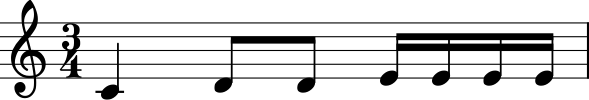

In [70]:
m.show()

Now let us add beams to the sixteenth notes, there's an even easier way to add multiple beams rather than calling append repeatedly, we can simply get the notes and call `.beams.fill()` with the number of beams we want (2) and their type, which will be "start", twice "continue", and once "stop":

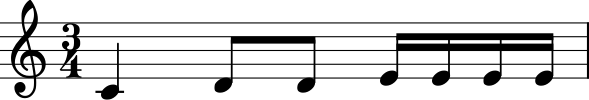

In [71]:
m.notes[3].beams.fill(2, 'start')
m.notes[4].beams.fill(2, 'continue')
m.notes[5].beams.fill(2, 'continue')
m.notes[6].beams.fill(2, 'stop')
m.show()

Suppose we wanted to put a secondary beam break in the middle of the sixteenth notes?  It involves changing the second beam (beam number 2) on `notes[4]` and `notes[5]`.  We do not want to change beam number 1, because it continues across the four notes:

In [72]:
m.notes[4].beams.setByNumber(1, 'stop')
m.notes[5].beams.setByNumber(1, 'start')

The output is not rendered in MuseScore, but works great in Finale 25:

![Secondary Beam Break](images/31-clefs-beam-break.png)

There are cases, such as dotted eighths followed by sixteenths, where partial beams are needed, these partial beams need to know their direction.  For instance:

In [73]:
m2 = stream.Measure()
m2.append(meter.TimeSignature('6/8'))
c4 = note.Note('C4')
d8 = note.Note('D4', type='eighth')
e8 = note.Note('E4', type='eighth')
e8.beams.append('start')
f16 = note.Note('F4', type='16th')
f16.beams.append('continue')

Now comes the second, partial beam, which we'll make go right:

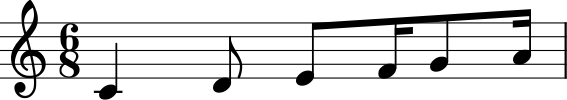

In [74]:
f16.beams.append('partial', 'right')
g8 = note.Note('G4', type='eighth')
g8.beams.append('continue')
a16 = note.Note('A4', type='16th')
a16.beams.append('stop')
a16.beams.append('partial', 'left')
m2.append([c4, d8, e8, f16, g8, a16])
m2.show()

This beamming implies that the dotted quarter is divided into three eighth notes.  If we wanted the beams to imply that the dotted quarter was divided into two dotted-eighth notes, we could switch the partial beam on `f16` to point to the left.  Unfortunately, none of the major MusicXML readers properly import the direction of partial beams ('backward hook' vs. 'forward hook')

## Beams the easy way

This section began by explaining what beams were like on the lowest possible level, but most of the time we're going to be too busy solving the world's great musicological/music theoretical/cognition/composition problems to worry about things like beaming!  So let's jump all the way to the other extreme, and look at beams in the easiest possible way.  If all you want is your score to look decently beamed when you show it, forget about setting beaming at all and just show it!

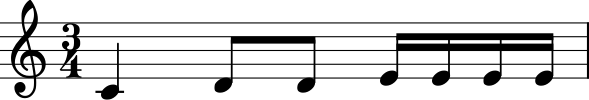

In [75]:
m = stream.Measure()
ts34 = meter.TimeSignature('3/4')
m.append(ts34)
c = note.Note('C4', type='quarter')
m.append(c)
d1 = note.Note('D4', type='eighth')
d2 = note.Note('D4', type='eighth')
m.append([d1, d2])
e = note.Note('E4', type='16th')
m.repeatAppend(e, 4)
m.show()

If the TimeSignature changes, `music21` will rebeam it differently:

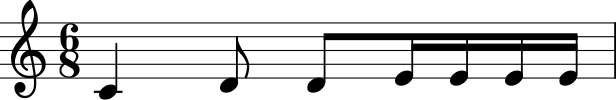

In [76]:
ts68 = meter.TimeSignature('6/8')
m.replace(ts34, ts68)
m.show()

This is accomplished because before showing the Stream, `music21` runs the powerful method :meth:`~music21.stream.base.Stream.makeNotation` on the stream.  This calls a function in :ref:`moduleStreamMakeNotation` module called :func:`~music21.stream.makeNotation.makeBeams` that does the real work.  That function checks the stream to see if any beams exist on it:

In [77]:
m.streamStatus.haveBeamsBeenMade()

False

If there are any beams in the stream, then that will return `True` and no beams will be made:

In [78]:
m.notes[-2].beams.fill(2, 'start')
m.notes[-1].beams.fill(2, 'stop')

m.streamStatus.haveBeamsBeenMade()

True

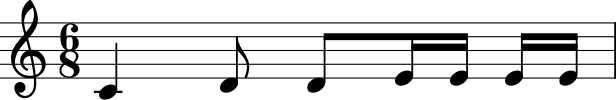

In [79]:
m.show()

In :ref:`Chapter 55<usersGuide_55_advancedMeter>` we will learn how to adjust `TimeSignature` objects to make them give different beaming patterns by default, but for now, you can trust that for most common time signatures, the beaming will be at least acceptable.

We've gone through the basics and more advanced topics regarding Clefs, Ties, and Beams, which are fundamental musical objects.  Other musical objects give great spice to music, and we will see them next in :ref:`Articulations <usersGuide_32_articulations>`.